In [1]:
#all imports
import numpy as np
import random
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

In [2]:
#variables declared here:
pix_edge_l = 15 #microns
pix_half_l = pix_edge_l / 2
num_pix_x = 10
num_pix_y = 10
e_per_photon = 1500 #electrons
subpix_edge_l = 1 #microns
diameter_e_cloud = 10 #microns
gain = 2 #electrons/DN
num_pix_img = 3 #this is the desired number of full size pixels that we want represented in the graph

In [3]:
#index:
#pix = pixel
#e = electron
#l = length
#num = number (of)
#pct = percent
#arr = array

In [4]:
#array for edge values
#edge_pix_arr (+1)
#calc edges for big array and subarray

In [5]:
#defining initial array representation of detector
#
detector_arr = np.zeros((num_pix_x, num_pix_y))
detector_arr_x = np.arange(num_pix_x) * pix_edge_l + pix_half_l
detector_arr_y = np.arange(num_pix_y) * pix_edge_l + pix_half_l
cen_x = np.arange(num_pix_x) * pix_edge_l + pix_half_l
cen_y = np.arange(num_pix_y) * pix_edge_l + pix_half_l
#edge_x
#edge_y

In [6]:
#finding random x & y of photon
photon_sphere_x = random.random() * pix_edge_l * num_pix_x #microns
photon_sphere_y = random.random() * pix_edge_l * num_pix_y #microns
photon_sphere_z = 15 #microns
print("photon hit at [x,y] = [" + str(photon_sphere_x) + ", " + str(photon_sphere_y) + "] microns")

photon hit at [x,y] = [49.31217505211465, 139.78241395605406] microns


In [7]:
#finding closest pixel to random x & y
closest_pix_x = (np.where(np.abs(detector_arr_x - photon_sphere_x) == np.min(np.abs(detector_arr_x - photon_sphere_x))))[0]
closest_pix_x_microns = closest_pix_x [0] * pix_edge_l + pix_half_l
closest_pix_y = (np.where(np.abs(detector_arr_y - photon_sphere_y) == np.min(np.abs(detector_arr_y - photon_sphere_y))))[0]
closest_pix_y_microns = closest_pix_y [0] * pix_edge_l + pix_half_l
closest_pix_arr = [closest_pix_x[0], closest_pix_y[0]]
closest_pix_microns = [closest_pix_x_microns, closest_pix_y_microns]
print("closest pixel to sphere: " + str(closest_pix_arr))
print("closest pixel's center in microns: " + str(closest_pix_microns))

closest pixel to sphere: [3, 9]
closest pixel's center in microns: [52.5, 142.5]


In [ ]:
#basically max num of pixels needed use % and make solution odd
#num_pix_img wants to be odd and calculated based on diameter of cloud and size of pixel 
#what # max pixels will the photon hit?
#mod (%)- remainder when you divide % + 1 if even
#diameter/ pixel size +1 check for odd and then add 1
num_pix_img = diameter_e_cloud / pix_edge_l

In [8]:
#setting up for numerical integration
#subpix_edge_l is declared in the variable section [ln 2]
#startpix =(tot # pix in graph - 1) / 2
subpix_half_l = subpix_edge_l / 2 #microns
num_pix_img =  #basically max num of pixels needed use % and make solution odd
start_pix = (num_pix_img - 1) / 2
#num_subpix is the number in x & y (rows and columns) they are always equal because the photon will always be a circle
num_subpix = num_subpix_x = num_subpix_y = round((pix_edge_l * num_pix_img) / subpix_edge_l)
num_subpix_z = photon_sphere_z * 2 #*** will need to be fixed/removed later
pix1 = num_subpix / 3 #needs to be generic 
pix2 = num_subpix * (2/3)
subpix_arr = np.zeros((num_subpix_x, num_subpix_y, num_subpix_z))
#needs to be a caluclated value dependant of size of detector pixels -1
subpix_x_cen = np.arange(num_subpix) * subpix_edge_l + (detector_arr_x[closest_pix_x - 1] - pix_half_l) + subpix_edge_l
subpix_y_cen = np.arange(num_subpix) * subpix_edge_l + (detector_arr_y[closest_pix_y -1] - pix_half_l) + subpix_edge_l  
subpix_z_cen = np.arange(num_subpix) * subpix_edge_l

In [9]:
subpix_x_cen
subpix_y_cen
num_subpix

45

In [10]:
for i in range(num_subpix):
    for j in range(num_subpix):
        for k in range(num_subpix):
            dist_cen_photon = np.sqrt((subpix_x_cen[i]-photon_sphere_x)**2 + \
                                                (subpix_y_cen[j]-photon_sphere_y)**2 + \
                                                (subpix_z_cen[k]-photon_sphere_z)**2)
            if dist_cen_photon < diameter_e_cloud / 2:
                subpix_arr[i,j,k] = 1.

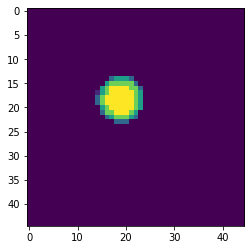

In [11]:
img = np.sum(subpix_arr, axis=2)
imgplot = plt.imshow(img)
#figure be self explanitory
#add legends etc. 
#voxel = 3D pixel
#add dashed lines to show pixel boarder

In [12]:
np.sum(img)

522.0

In [13]:
#LOOP through the different pixels by varying the input
pct_pix1 = np.sum(img[0:int(pix1), 0:int(pix1)]) / np.sum(img)
pct_pix2 = np.sum(img[0:int(pix1), int(pix1):int(pix2)]) / np.sum(img)
pct_pix3 = np.sum(img[0:int(pix1), int(pix2):int(num_subpix)]) / np.sum(img)
pct_pix4 = np.sum(img[int(pix1):int(pix2), 0:int(pix1)]) / np.sum(img)
pct_pix5 = np.sum(img[int(pix1):int(pix2), int(pix1):int(pix2)]) / np.sum(img)
pct_pix6 = np.sum(img[int(pix1):int(pix2), int(pix2):int(num_subpix)]) / np.sum(img)
pct_pix7 = np.sum(img[int(pix2):int(num_subpix), 0:int(pix1)]) / np.sum(img)
pct_pix8 = np.sum(img[int(pix2):int(num_subpix), int(pix1):int(pix2)]) / np.sum(img)
pct_pix9 = np.sum(img[int(pix2):int(num_subpix), int(pix2):int(num_subpix)]) / np.sum(img)

In [14]:
#range(start val(opt), end val (req)(up to but not including), incriments (opt)(default = 1))
for pct_pix in range(1, 10):
    

SyntaxError: unexpected EOF while parsing (<ipython-input-14-9529b61fef39>, line 3)

In [ ]:
#LOOP through this print function?? 
print("% in first pixel: " + str(pct_pix_1 * 100) + "%")
print("% in second pixel: " + str(pct_pix_2 * 100) + "%")
print("% in third pixel: " + str(pct_pix_3 * 100) + "%")
print("% in fourth pixel: " + str(pct_pix_4 * 100) + "%")
print("% in fifth pixel: " + str(pct_pix_5 * 100) + "%")
print("% in sixth pixel: " + str(pct_pix_6 * 100) + "%")
print("% in seventh pixel: " + str(pct_pix_7 * 100) + "%")
print("% in eigth pixel: " + str(pct_pix_8 * 100) + "%")
print("% in ninth pixel: " + str(pct_pix_9 * 100) + "%")

In [ ]:
detector_arr[closest_pix_x,closest_pix_y] += percent_pix_1 * e_per_photon

In [ ]:
#LOOP?
#for e_pix in range(1,10):
    #round(e_per_photon * pct_pix)
e_pix_1 = round(e_per_photon * pct_pix_1)
e_pix_2 = round(e_per_photon * pct_pix_2)
e_pix_3 = round(e_per_photon * pct_pix_3)
e_pix_4 = round(e_per_photon * pct_pix_4)
e_pix_5 = round(e_per_photon * pct_pix_5)
e_pix_6 = round(e_per_photon * pct_pix_6)
e_pix_7 = round(e_per_photon * pct_pix_7)
e_pix_8 = round(e_per_photon * pct_pix_8)
e_pix_9 = round(e_per_photon * pct_pix_9)

In [ ]:
#can make if else statement for this, so you don't have to check the zeros
print('1. ' + str(detector_arr[closest_pix_x - 1, closest_pix_y - 1]))
print('2. ' + str(detector_arr[closest_pix_x, closest_pix_y - 1]))
print('3. ' + str(detector_arr[closest_pix_x + 1, closest_pix_y - 1]))
print('4. ' + str(detector_arr[closest_pix_x - 1, closest_pix_y]))
print('5. ' + str(detector_arr[closest_pix_x, closest_pix_y]))
print('6. ' + str(detector_arr[closest_pix_x + 1, closest_pix_y]))
print('7. ' + str(detector_arr[closest_pix_x - 1, closest_pix_y + 1]))
print('8. ' + str(detector_arr[closest_pix_x, closest_pix_y + 1]))
print('9. ' + str(detector_arr[closest_pix_x + 1, closest_pix_y + 1]))

In [ ]:
detector_arr[closest_pix_x - 1, closest_pix_y - 1] += e_pix1
detector_arr[closest_pix_x, closest_pix_y - 1] += e_pix2
detector_arr[closest_pix_x + 1, closest_pix_y - 1] += e_pix3
detector_arr[closest_pix_x - 1, closest_pix_y] += e_pix4
detector_arr[closest_pix_x, closest_pix_y] += e_pix5
detector_arr[closest_pix_x + 1, closest_pix_y] += e_pix6
detector_arr[closest_pix_x - 1, closest_pix_y + 1] += e_pix7
detector_arr[closest_pix_x, closest_pix_y + 1] += e_pix8
detector_arr[closest_pix_x + 1, closest_pix_y + 1] += e_pix9

In [ ]:
print('1. ' + str(detector_arr[closest_pix_x - 1, closest_pix_y - 1]))
print('2. ' + str(detector_arr[closest_pix_x, closest_pix_y - 1]))
print('3. ' + str(detector_arr[closest_pix_x + 1, closest_pix_y - 1]))
print('4. ' + str(detector_arr[closest_pix_x - 1, closest_pix_y]))
print('5. ' + str(detector_arr[closest_pix_x, closest_pix_y]))
print('6. ' + str(detector_arr[closest_pix_x + 1, closest_pix_y]))
print('7. ' + str(detector_arr[closest_pix_x - 1, closest_pix_y + 1]))
print('8. ' + str(detector_arr[closest_pix_x, closest_pix_y + 1]))
print('9. ' + str(detector_arr[closest_pix_x + 1, closest_pix_y + 1]))

In [ ]:
#!!! sometimes this "check" doesnt work: ask if theres a better numpy function to be precise
check_tot_e = np.sum(detector_arr)
if (check_tot_e == e_per_photon):
    print('No rounding error. total number of electrons = ' + str(e_per_photon))
else:
    print('***ROUNDING ERROR: total number of electrons is != ' + str(e_per_photon) + ". It is = " + str(check_tot_e))

In [ ]:
#digitize array using np.digitize
#make array values integers
#how would you find the gain if you weren't given it?
#what kind of errors are introduced?
#how many times to measure a single photon to get rid of error?
#numpy.digitize(x, bins, right=False(optional))
#numpy.histogram(a, bins=10, range=None, normed=None, weights=None, density=None)

#assume 2 electrons/DN
#gain = (# of electrons per pixel) / (# of counts per pixel)
#stdev (photons)  =  sqrt(number of photons)

In [ ]:
#here the data in detector_arr is still float it will become integer when digitized below
detector_arr = np.round(detector_arr * (1 / gain))

In [ ]:
#NOTES:
#could you figure out, gain? figure out gain if the # of electrons per photon is known and output is known
#How well would you know it?  

#What kind of errors are introduced by the charge sharing and digitization? 
        # we already have a rounding error before digitization, but after digitizing it can cause errors 
        # because we have less information... we only know which pixels are "on"
#How many times do you need to measure this single photon signal to beat down those errors?

#The gain value is set by the electronics that read out the CCD chip. 
#Gain is expressed in units of electrons per count. 
#For example, a gain of 1.8 e-/count means that the camera produces 1 count for every 1.8 recorded electrons.
#Of course, we cannot split electrons into fractional parts, as in the case for a gain of 1.8 e-/count. 
#What this number means is that 4/5 of the time 1 count is produced from 2 electrons, and 1/5 of the time 1 count is produced from 1 electron. 
#This number is an average conversion ratio, based on changing large numbers of electrons into large numbers of counts.
#Note: This use of the term "gain" is in the opposite sense to the way a circuit designer would use the term since, 
#in electronic design, gain is considered to be an increase in the number of output units compared with the number of input units.

In [ ]:
imgplot = plt.imshow(detector_arr[int(closest_pix_x[0]-5):int(closest_pix_x[0] + 5), int(closest_pix_y[0]) - 5:closest_pix_y[0] + 5])

In [ ]:
print(np.max(detector_arr))

In [ ]:
print(np.sum(detector_arr))

In [ ]:
if (np.sum(detector_arr) == 750):
    print('no problem')
else:
    print('error: sum of detector did not result in expected value')